In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('unplugged.csv')
data.head()
data.sample(frac=1)
data = data[0:360]
del data['Comments']

In [3]:
gender = {'M': 1, 'F': 2}
data.Gender = [gender[item] for item in data.Gender]

after = {'F': 0, 'P': 1}
data.Results_After   = [after[item] for item in data.Results_After]

before = {'F': 0, 'P': 1}
data.Results_Before   = [before[item] for item in data.Results_Before]

print(data.describe())

data =  data[['Age', 'Gender', 'Class', 'Results_Before', 'Results_After']]

              Age      Gender  Results_Before  Results_After       Class
count  360.000000  360.000000      360.000000     360.000000  360.000000
mean     9.616667    1.630556        0.391667       0.752778    4.052778
std      1.287502    0.483326        0.488802       0.431997    0.619995
min      7.000000    1.000000        0.000000       0.000000    3.000000
25%      9.000000    1.000000        0.000000       1.000000    4.000000
50%     10.000000    2.000000        0.000000       1.000000    4.000000
75%     10.000000    2.000000        1.000000       1.000000    4.000000
max     14.000000    2.000000        1.000000       1.000000    5.000000


In [15]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Age,Gender,Class,Results_Before,Results_After
0,0.945732,0.078811,0.315244,0.000000,0.000000
1,0.912871,0.182574,0.365148,0.000000,0.000000
2,0.924500,0.092450,0.369800,0.000000,0.000000
3,0.945732,0.078811,0.315244,0.000000,0.000000
4,0.878114,0.109764,0.439057,0.109764,0.109764


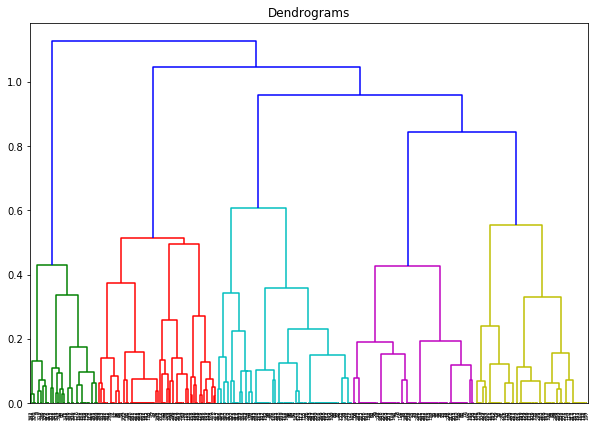

In [16]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

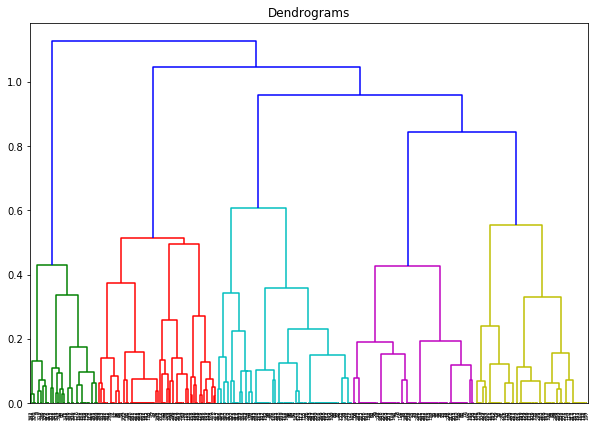

In [17]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=15, color='r', linestyle='--')

In [28]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='single')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

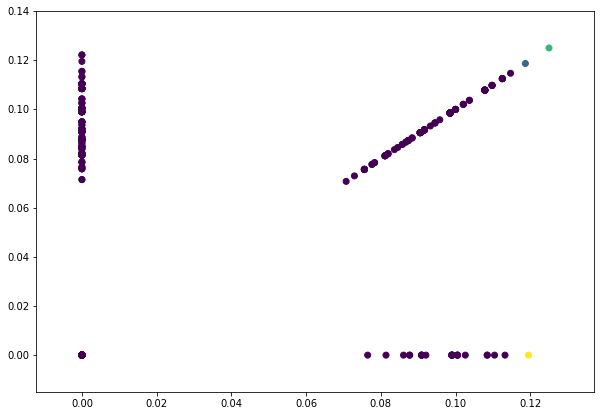

In [29]:

plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Results_Before'], data_scaled['Results_After'], c=cluster.labels_) 